## Mount with your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setup darknet environment

In [2]:
import os

In [3]:
# remove the existing folder if have
!rm -r darknet_for_colab
# download and compile darknet_for_colab
!git clone https://github.com/quangnhat185/darknet_for_colab.git
%cd darknet_for_colab

rm: cannot remove 'darknet_for_colab': No such file or directory
Cloning into 'darknet_for_colab'...
remote: Enumerating objects: 1083, done.
remote: Total 1083 (delta 0), reused 0 (delta 0), pack-reused 1083
Receiving objects: 100% (1083/1083), 5.16 MiB | 13.81 MiB/s, done.
Resolving deltas: 100% (233/233), done.
/content/darknet_for_colab


In [4]:
#Change makefile as the page(if not got error): https://github.com/quangnhat185/darknet_for_colab/issues/2
#Changing the line ARCH= -gencode arch=compute_30,code=sm_30 \ to ARCH= -gencode arch=compute_50,code=sm_50 \
#Delete file, replace with the correct one with ARCH= -gencode arch=compute_50,code=sm_50 \
!rm -r Makefile
!cp '/content/drive/MyDrive/FYP/Makefile' '/content/darknet_for_colab/Makefile'

In [5]:
!make clean
!make

rm -rf ./obj/image_opencv.o ./obj/http_stream.o ./obj/gemm.o ./obj/utils.o ./obj/dark_cuda.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/darknet.o ./obj/detection_layer.o ./obj/captcha.o ./obj/route_layer.o ./obj/writing.o ./obj/box.o ./obj/nightmare.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/coco.o ./obj/dice.o ./obj/yolo.o ./obj/detector.o ./obj/layer.o ./obj/compare.o ./obj/classifier.o ./obj/local_layer.o ./obj/swag.o ./obj/shortcut_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/rnn.o ./obj/rnn_vid.o ./obj/crnn_layer.o ./obj/demo.o ./obj/tag.o ./obj/cifar.o ./obj/go.o ./obj/batchnorm_layer.o ./obj/art.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/reorg_ol

In [6]:
!chmod +x ./darknet

## Download pre-trained weight: darknet53.conv.74

In [7]:
#!wget https://pjreddie.com/media/files/darknet53.conv.74

## Download custom dataset (yolo format)

In [8]:
#Change config to 320x320
!cp /content/drive/MyDrive/FYP/data.zip /content/darknet_for_colab
!unzip data.zip 

Streaming output truncated to the last 5000 lines.
  inflating: data/ts_aug/350_3_00857.txt  
  inflating: data/ts_aug/223_4_00395.jpg  
  inflating: data/ts_aug/23_2_00054.txt  
  inflating: data/ts_aug/249_4_00844.jpg  
  inflating: data/ts_aug/216_4_00788.txt  
  inflating: data/ts_aug/613_4_00167.jpg  
  inflating: data/ts_aug/407_1_00784.jpg  
  inflating: data/ts_aug/377_0_00119.jpg  
  inflating: data/ts_aug/290_2_00172.txt  
  inflating: data/ts_aug/512_0_00112.txt  
  inflating: data/ts_aug/533_3_00195.txt  
  inflating: data/ts_aug/574_3_00453.jpg  
  inflating: data/ts_aug/194_1_00033.jpg  
  inflating: data/ts_aug/701_2_00125.txt  
  inflating: data/ts_aug/612_4_00220.txt  
  inflating: data/ts_aug/322_2_00653.txt  
  inflating: data/ts_aug/155_3_00140.jpg  
  inflating: data/ts_aug/13_2_00240.jpg  
  inflating: data/ts_aug/531_1_00129.jpg  
  inflating: data/ts_aug/620_1_00133.txt  
  inflating: data/ts_aug/170_3_00005.jpg  
  inflating: data/ts_aug/557_1_00822.jpg  
  inf

## Create custom config files (yolov4_custom_train.cfg and yolov4_custom_test.cfg)

In [9]:
#!python yolov4_setup.py

In [10]:
!cp /content/drive/MyDrive/FYP/yolo3-tiny_xnor_test.cfg cfg/yolo3-tiny_xnor_test.cfg 
!cp /content/drive/MyDrive/FYP/yolo3-tiny_xnor_train.cfg cfg/yolo3-tiny_xnor_train.cfg 

## Create symbolic link in our Drive (To store backup)
Need to have YOLOv4/backup directory in the drive

In [11]:
#Delete folder
!rm /content/darknet_for_colab/backup -r

#Creat symbolic link
!ln -s /content/drive/'My Drive'/YOLOv4_weight/backup /content/darknet_for_colab

## Training (Gonna take super long ;_;)

In [ ]:
#Train from start
#!./darknet detector train data/yolov4.data cfg/yolo3-tiny_xnor_train.cfg  darknet53.conv.74 -dont_show -map

In [ ]:
#In case training stop suddenly
!./darknet detector train data/yolov4.data cfg/yolo3-tiny_xnor_train.cfg  backup/yolo3-tiny_xnor_train_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 251752, rewritten_bbox = 2.404747 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.360873, GIOU: 0.265446), Class: 0.728038, Obj: 0.347606, No Obj: 0.001656, .5R: 0.142857, .75R: 0.000000, count: 7, class_loss = 1.844740, iou_loss = 1.086696, total_loss = 2.931436 
 total_bbox = 251759, rewritten_bbox = 2.404681 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000006, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.403191, GIOU: 

## Test with image

In [12]:
#Download and unzip example images
!wget --no-check-certificate "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21120&authkey=AM5VslNNW9a8aO8" -O examples.zip
!unzip examples.zip
!rm -r examples.zip

--2022-04-21 08:41:31--  https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21120&authkey=AM5VslNNW9a8aO8
Resolving onedrive.live.com (onedrive.live.com)... 52.228.38.82
Connecting to onedrive.live.com (onedrive.live.com)|52.228.38.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://sbjm1a.db.files.1drv.com/y4mAraWolDTgYURhzEB2-vuv-96sRGZqrN0tIAbOTyd_sgHS4laOO3VUi3PjVCx_OkAaiCE_N8wCoij-_1CpMKhSYF1B-fT75FVShkfhlnHqC7z_YxQPCMWVi0FBkFV7mo6VRVATWjncHdeHRBY-J_jvSrsbNgKDCq1qBckhOMRdWF-gLptkpx3LrqBtFLxziXI8YIjOKfhFJnde359GlS7WA/examples.zip?download&psid=1 [following]
--2022-04-21 08:41:32--  https://sbjm1a.db.files.1drv.com/y4mAraWolDTgYURhzEB2-vuv-96sRGZqrN0tIAbOTyd_sgHS4laOO3VUi3PjVCx_OkAaiCE_N8wCoij-_1CpMKhSYF1B-fT75FVShkfhlnHqC7z_YxQPCMWVi0FBkFV7mo6VRVATWjncHdeHRBY-J_jvSrsbNgKDCq1qBckhOMRdWF-gLptkpx3LrqBtFLxziXI8YIjOKfhFJnde359GlS7WA/examples.zip?download&psid=1
Resolving sbjm1a.db.files.1drv.com (sbjm1a.db.files.1drv.com)

In [23]:
#Duplicate yolov4.data
%cp data/yolov4.data cfg/coco.data

In [24]:
import time
#Run on the image
img_path = "examples/test_image_4.jpg"
!./darknet detect cfg/yolo3-tiny_xnor_test.cfg /content/drive/MyDrive/YOLOv4_weight/backup/yolo3-tiny_xnor_train_final.weights {img_path} -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  16 0.088 BF
   1 max                2x 2/ 2    320 x 320 x  16 ->  160 x 160 x  16 0.002 BF
   2 convXB   32       3 x 3/ 1    160 x 160 x  16 ->  160 x 160 x  32 0.007 BF
   3 max                2x 2/ 2    160 x 160 x  32 ->   80 x  80 x  32 0.001 BF
   4 convXB   64       3 x 3/ 1     80 x  80 x  32 ->   80 x  80 x  64 0.007 BF
   5 max                2x 2/ 2     80 x  80 x  64 ->   40 x  40 x  64 0.000 BF
   6 convXB  128       3 x 3/ 1     40 x  40 x  64 ->   40 x  40 x 128 0.007 BF
   7 max                2x 2/ 2     40 x  40 x 128 ->   20 x  20 x 128 0.000 BF
   8 convX   256       3 x 3/ 1     20 x  20 x 128 ->   20 x  20 x 

In [25]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

True

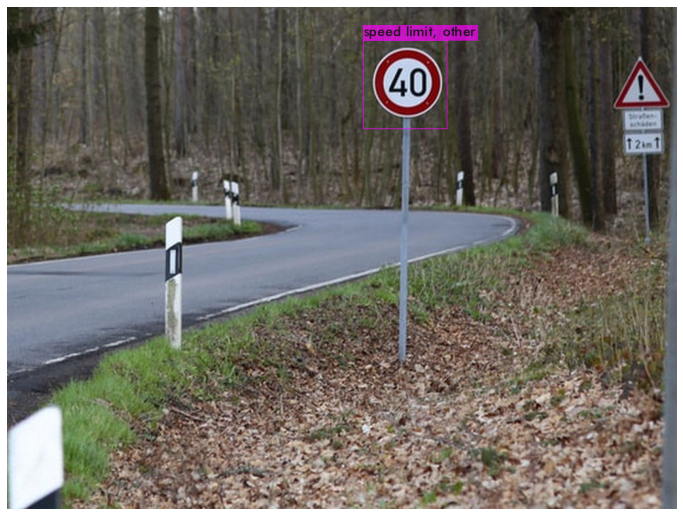

In [26]:
#Print processed image
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)
#Saved the prediction image
cv2.imwrite('/content/drive/MyDrive/FYP/prediction_image.png' , processed_image)

## Test with video

In [27]:
start=time.time()
!python darknet_video.py -v examples/test_video.mp4 -c cfg/yolo3-tiny_xnor_test.cfg -w /content/drive/MyDrive/YOLOv4_weight/backup/yolo3-tiny_xnor_train_final.weights -o output.mp4
end=time.time()

 Try to load cfg: cfg/yolo3-tiny_xnor_test.cfg, weights: /content/drive/MyDrive/YOLOv4_weight/backup/yolo3-tiny_xnor_train_final.weights, clear = 0 
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  16 0.088 BF
   1 max                2x 2/ 2    320 x 320 x  16 ->  160 x 160 x  16 0.002 BF
   2 convXB   32       3 x 3/ 1    160 x 160 x  16 ->  160 x 160 x  32 0.007 BF
   3 max                2x 2/ 2    160 x 160 x  32 ->   80 x  80 x  32 0.001 BF
   4 convXB   64       3 x 3/ 1     80 x  80 x  32 ->   80 x  80 x  64 0.007 BF
   5 max                2x 2/ 2     80 x  80 x  64 ->   40 x  40 x  64 0.000 BF
   6 convXB  128       3 x 3/ 1     40 x  40 x  64 ->   40 x  40 x 128 0.007 BF
   7 max                2x 2/ 2     40 x  40 x 128 ->   20 x  20 x 128 0.000 BF


In [28]:
print("Total time taken for detecting a video = ",end - start)

Total time taken for detecting a video =  9.59447169303894


In [29]:
#Save the video
!cp output.mp4 /content/drive/MyDrive/FYP/output.mp4